In [4]:
import pandas as pd
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes, svm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from xgboost import XGBClassifier

from keras.optimizers import Nadam, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# specify cluster
column = 'kmeans'

## load file
df = pd.read_csv('/content/drive/MyDrive/Mails_clustered.csv',  converters={'Body_processed':eval})

# shuffle data frame
df.sample(frac=1)

def very_special_tokenizer(text):
    return text

# TF-IDF text
tokenized_text = df['Body_processed'].to_numpy() 
tfidf = TfidfVectorizer(tokenizer=very_special_tokenizer, lowercase=False, sublinear_tf=True)    
x = tfidf.fit_transform(df['Body_processed'].to_numpy())

# Label encoder
encoder = LabelEncoder()
encoder.fit(df[column])
y = encoder.transform(df[column])

print(list(encoder.classes_))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(y_test)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[11 19  0 11  6 11 20 20 19  6 24  0 11 24  6 14  4  4 22 21  1 15 11 23
  0  3 20 27  9 11  1 21  3  7 24 11  7 11 22  1 25 28 25  1  5  5 17 11
 11 13 20 19 22 11 17 29  0 13 18 11 24 20 19  0  0 24 22 11  5  9 10 22
  1 22  1  0  9 10 13 19 27 19  9  7 11 11  1 11  9  1 24 11  0 16 29 27
 14 11  3 11 11  3 12  1 16 18 13 11 13 28  0 19  2  0 23 11  6 24 13 20
  7 29 14 13  1 17 22  0 14 19 11 24 11  7  4  4  4  2 25 11 11 29  4 29
 24 29 11 12  9 11  0  7 29 26  9 24  4 14 15 14 29 10 19 12 11  3 11 10
 10  4 14  0 11  0 25  3  3 11  6 12 12 11 11  8  4 11 28 28 22 11 11 11
 11 28 11 11 11 28 11 13 11  0 11 24 11  7 20 12 29 19  4 11 20  5 24 19
 11  6 11  3 11 11 27  9  6  1 11 17  0 19  3]


## SVM

In [ ]:
# create SVM
SVM = svm.SVC(C=5, kernel='linear')

print(x_train.shape)
# fit the training dataset on the classifier
SVM.fit(x_train,y_train)
# predict the labels on test dataset
print(x_test.shape)
predictions_SVM = SVM.predict(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy: ", accuracy_score(predictions_SVM, y_test)*100)

(924, 12754)
(231, 12754)
SVM Accuracy:  95.67099567099568


## Random Forest

In [ ]:
# random forest
random = RandomForestClassifier()
random.fit(x_train, y_train)

# make predictions for test data
y_pred = random.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.18%


## KNN

In [ ]:
# Build the model
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(x_train,y_train)
predictions_NB = neigh.predict(x_test)

# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

KNN Accuracy Score ->  83.98268398268398


## Naive Bayes

In [ ]:
# Build the model
Naive = naive_bayes.MultinomialNB()
Naive.fit(x_train,y_train)

predictions_NB = Naive.predict(x_test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  52.81385281385281


## XGBoost

In [ ]:
model1 = XGBClassifier(verbosity=0)
model1.fit(x_train, y_train)
# make predictions for test data
predictions_XGB = model1.predict(x_test)

print("Accuracy: ", (accuracy_score(y_test, predictions_XGB) * 100.0))

Accuracy:  88.74458874458875


## Logistic Regression

In [ ]:
# Build the model
log_reg = LogisticRegression(
    solver='liblinear',
    C=5,
)
# fit the training dataset on the classifier
log_reg.fit(x_train, y_train)

print(len(log_reg.coef_))
# predict the labels on test dataset
predictions_log_reg = log_reg.predict(x_test)

# Use accuracy_score function to get the accuracy
print("log_reg Accuracy: ", accuracy_score(predictions_log_reg, y_test)*100)

30
log_reg Accuracy:  93.07359307359307


## Neural Network

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
def very_special_tokenizer(text):
  return text
def load(path):
  classes = ['ABD','ACML','ANLP','DA','DM','Exams','Incognito','Information','IRTM','Library','LP','MAI','MAI','MIDF','MM','MS','NM','Not Important','Project - 2-2','PS','Schedules and Deadlines','SIP','Social','Social Dutch','Submissions','TCS','UMNews','UMSports']

  documents_train = load_obj(path+'/documents_train.pkl')
  documents_test = load_obj(path+'/documents_test.pkl')

  df_train = pd.DataFrame.from_dict(documents_train, orient='index').drop(['fixed', 'vector'],axis=1)
  df_test = pd.DataFrame.from_dict(documents_test, orient='index').drop(['fixed', 'vector'],axis=1)

  tokenized_text =  np.concatenate((df_train['tokens'].to_numpy(), df_test['tokens'].to_numpy()), axis=0) 

  tfidf = TfidfVectorizer(tokenizer=very_special_tokenizer, lowercase=False, sublinear_tf=True)
  tfidf.fit(tokenized_text)

  X_train = tfidf.transform(df_train['tokens'].to_numpy())
  y_train = df_train['class'].to_numpy()

  X_test = tfidf.transform(df_test['tokens'].to_numpy())
  y_test = df_test['class'].to_numpy()

  
  return df_train, df_test, X_train, X_test, y_train, y_test, classes

In [20]:
from google.colab import drive
drive.mount("/content/drive")

from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix

df_train, df_test, X_train, X_test, y_train, y_test, classes = load('drive/MyDrive/IRTM/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [21]:
max_words = 12987

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, int(num_classes))
y_test = utils.to_categorical(y_test, int(num_classes))


x_train = X_train.toarray()
x_test = X_test.toarray()

In [23]:
max_words = 12986

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               6649344   
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 28)               

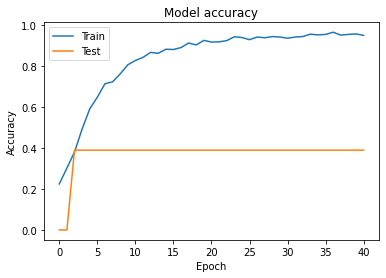

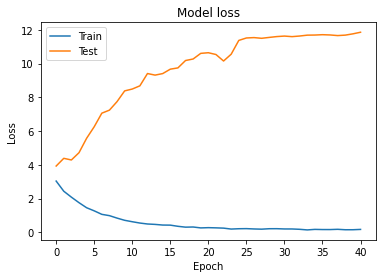

In [24]:


batch_size = 8
epochs = 50

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.82))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.82))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(lr=0.0008),
              metrics=['accuracy'])

print(model.summary())

print(x_train.shape)
print(y_train.shape)

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
model_save = ModelCheckpoint('.model_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=25, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[earlyStopping, model_save, reduce_lr_loss],
                    verbose=1,
                    validation_split=0.1)

print(x_test.shape)
print(y_test.shape)

score = model.evaluate(x_test, y_test, verbose=1)

print('test accuracy:', score[1])

model.save('ANN_model_now.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## CNN

In [ ]:
from keras.preprocessing import text, sequence
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D

max_words= 2000

df = pd.read_csv('/content/drive/MyDrive/Mails_clustered.csv',  converters={'Body_processed':eval})

df['joint'] = ""

for index, row in df.iterrows():
  df.at[index, 'joint'] = " ".join(row['Body_processed'])

tokenized_text = df['joint'].to_numpy() 

tokenize = text.Tokenizer(char_level=False)
tokenize.fit_on_texts(tokenized_text) # only fit on train

x = tokenize.texts_to_sequences(tokenized_text)
x = sequence.pad_sequences(x, maxlen=max_words) 

voc_x_len = np.max(x) +1
print(voc_x_len)

# Label encoder
encoder = LabelEncoder()
encoder.fit(df[column])
y = encoder.transform(df[column])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(y_train.shape)

12171
(924, 30)


In [ ]:
batch_size = 50
epochs = 100
# Build the model
print(x_train.shape)
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(voc_x_len,embedding_vecor_length, input_length=max_words))
model.add(Dropout(0.8))
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(250,3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(Dropout(0.5))
# we use max pooling:
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Nadam(lr=0.0008), metrics=['accuracy'])

print(model.summary())



earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
model_save = ModelCheckpoint('.model_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

history = model.fit(x_train, y_train, epochs=110, batch_size=8, callbacks=[earlyStopping, model_save, reduce_lr_loss],
                    validation_split=0.1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

model.save('CNN_best_almost_test.h5')

(924, 2000)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          389472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000, 32)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1998, 250)         24250     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1998, 250)         0         
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                7530      
Total params: 421,252
Trainable params: 421,252
Non-trainable params: 0
____________________________________

KeyboardInterrupt: ignored